<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem III
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>AWS EC2;</li>
  <li>AWS SageMaker;</li>
  <li>AWS Acesso Externo.</li>
</ol>

---

# **Exercícios**

## 1\. AWS SageMaker

Replique as atividades do item 2.3 em sua conta.
----
<br><br>
<li>Criar um *bucket* no S3:


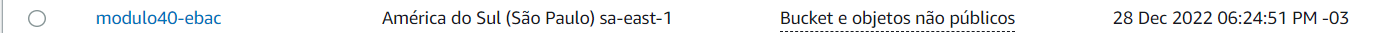

<li>Fazer o upload de um objeto no bucket:

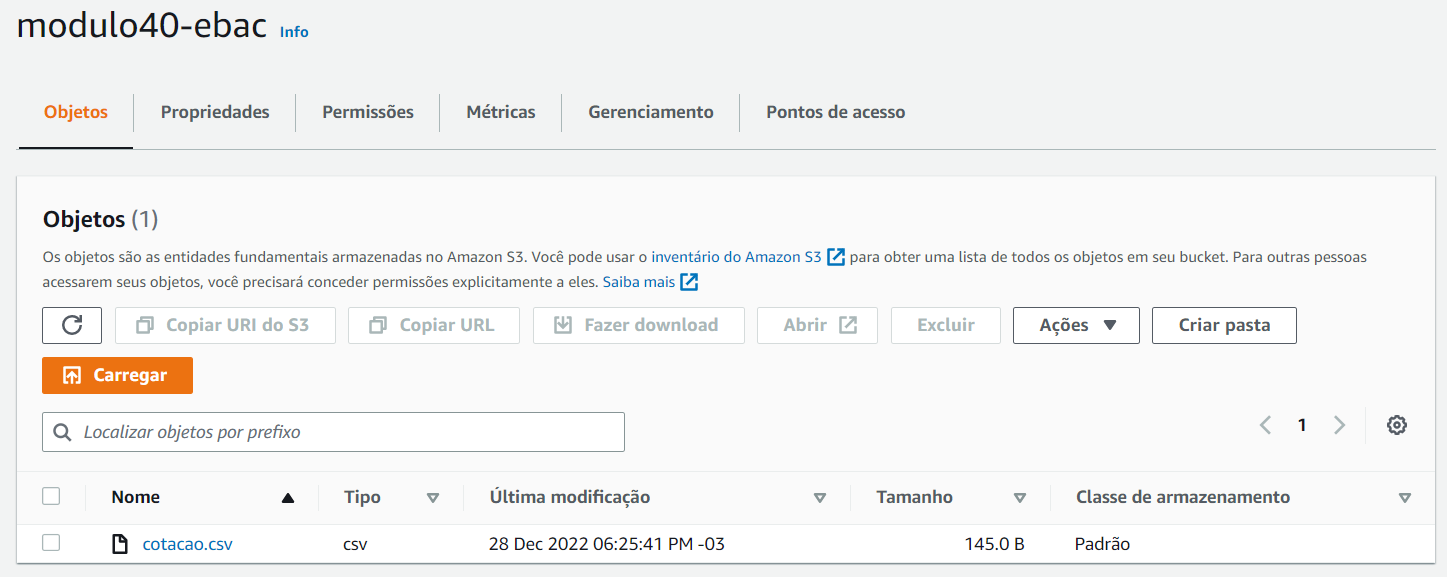

<li>Criando o notebook:



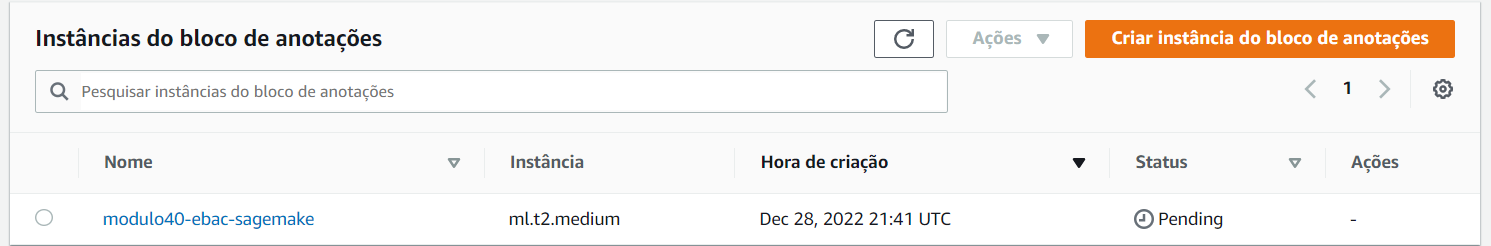

<li>Carregar o objeto do bucket no notebook:


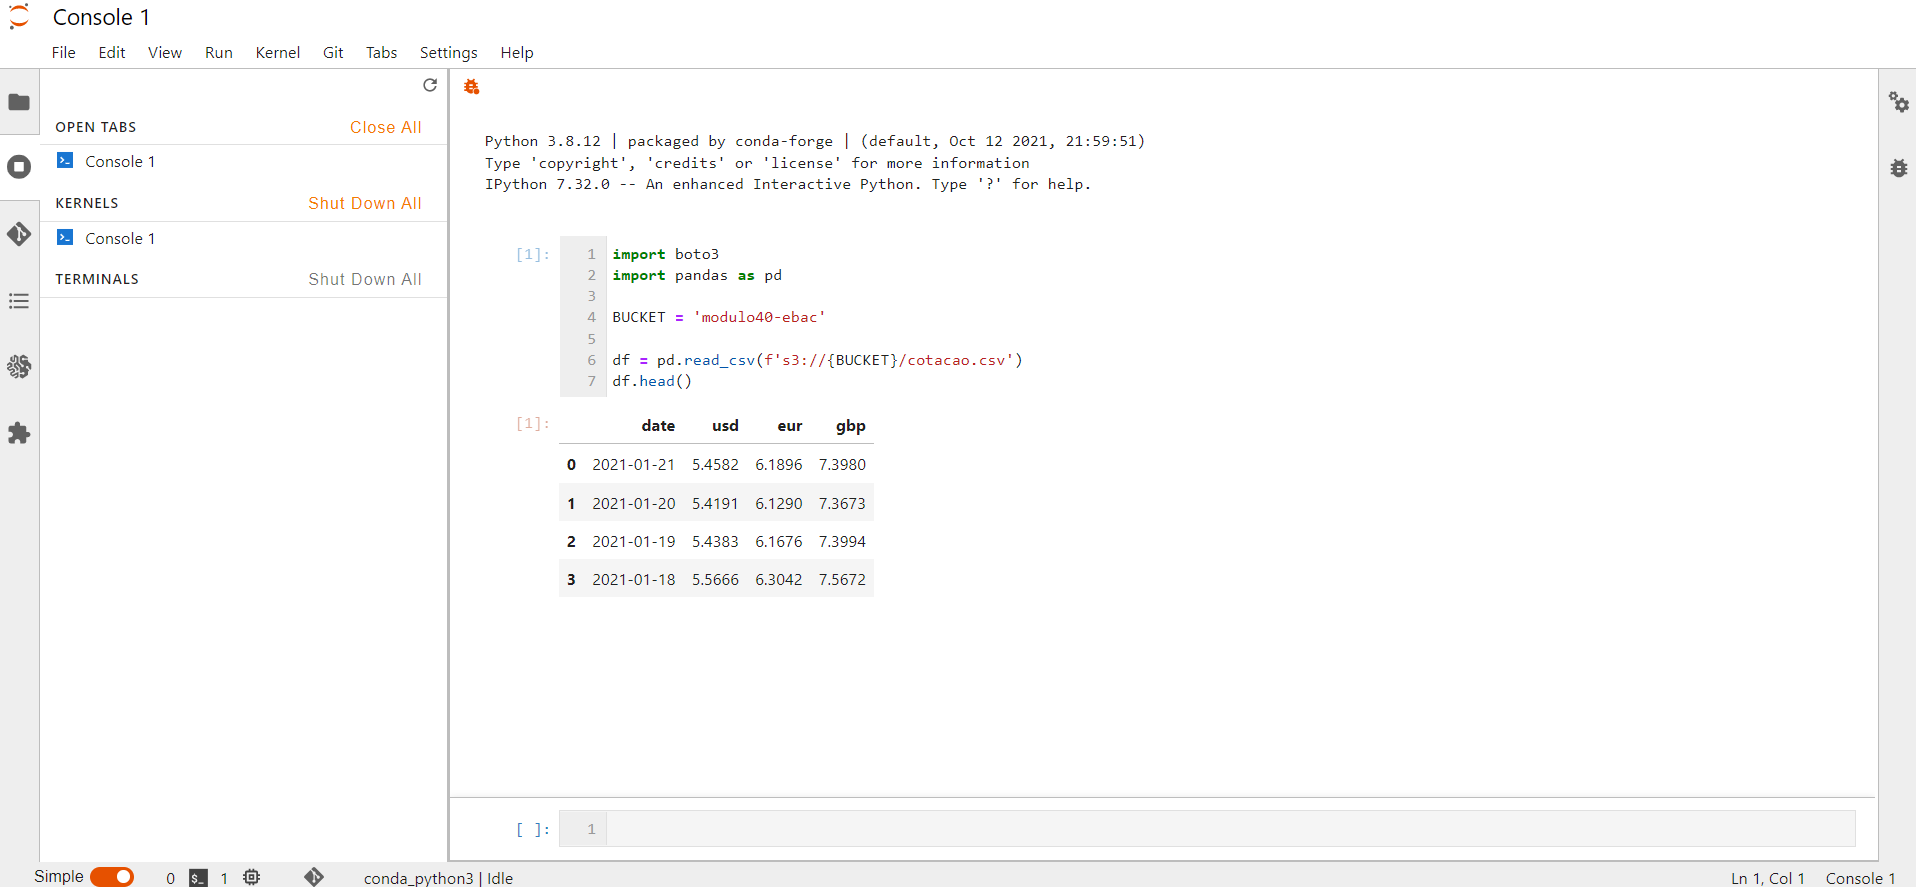

<li>Desligar a instância do AWS EC2 do notebook:

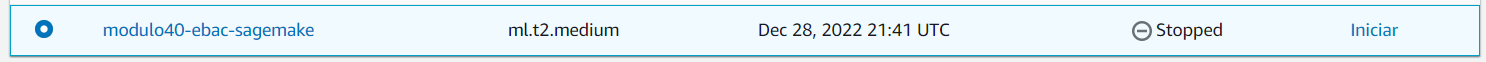

## 2\. AWS Acesso Externo

Replique as atividades do item 3.1 em sua conta.


In [2]:
# Instalando o boto3:
!pip install boto3==1.26.39

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 30.2 MB/s 
     |████████████████████████████████| 10.3 MB 79.2 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 140 kB 81.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.13 which is incompatible.


In [3]:
import pandas as pd

import boto3
from getpass import getpass

# Utilizando a biblioteca getpass para ocultar as informações:
user = getpass()
password = getpass()


# Cliente de acesso ao S3:
client = boto3.client('s3', aws_access_key_id=user, aws_secret_access_key=password)


··········
··········


In [4]:
# Nome do diretório do AWS
BUCKET = 'modulo40-ebac'

# Usando o cliente de acesso para para baixar o arquivo de cotação no diretório do aws:
client.download_file(BUCKET, 'cotacao.csv', 'cotacao_aws.csv')

In [5]:
# Extrair os dados via Pandas:

df = pd.read_csv('cotacao_aws.csv')
df.head()

,date,usd,eur,gbp
0,2021-01-21,5.4582,6.1896,7.3980
1,2021-01-20,5.4191,6.1290,7.3673
2,2021-01-19,5.4383,6.1676,7.3994
3,2021-01-18,5.5666,6.3042,7.5672


In [6]:
# Carregando o DataFrame no diretório do aws:
client.upload_file(Filename='cotacao_aws.csv', Bucket=BUCKET, Key='cotacao_aws.csv')


# OBS: o acesso do cliente só tem permissão para leitura de arquivos, não pode alterar ou excluir.

S3UploadFailedError: ignored